# Logistic Regression Transition to Neural Networks

<div style="margin-left: auto; margin-right: 0;">
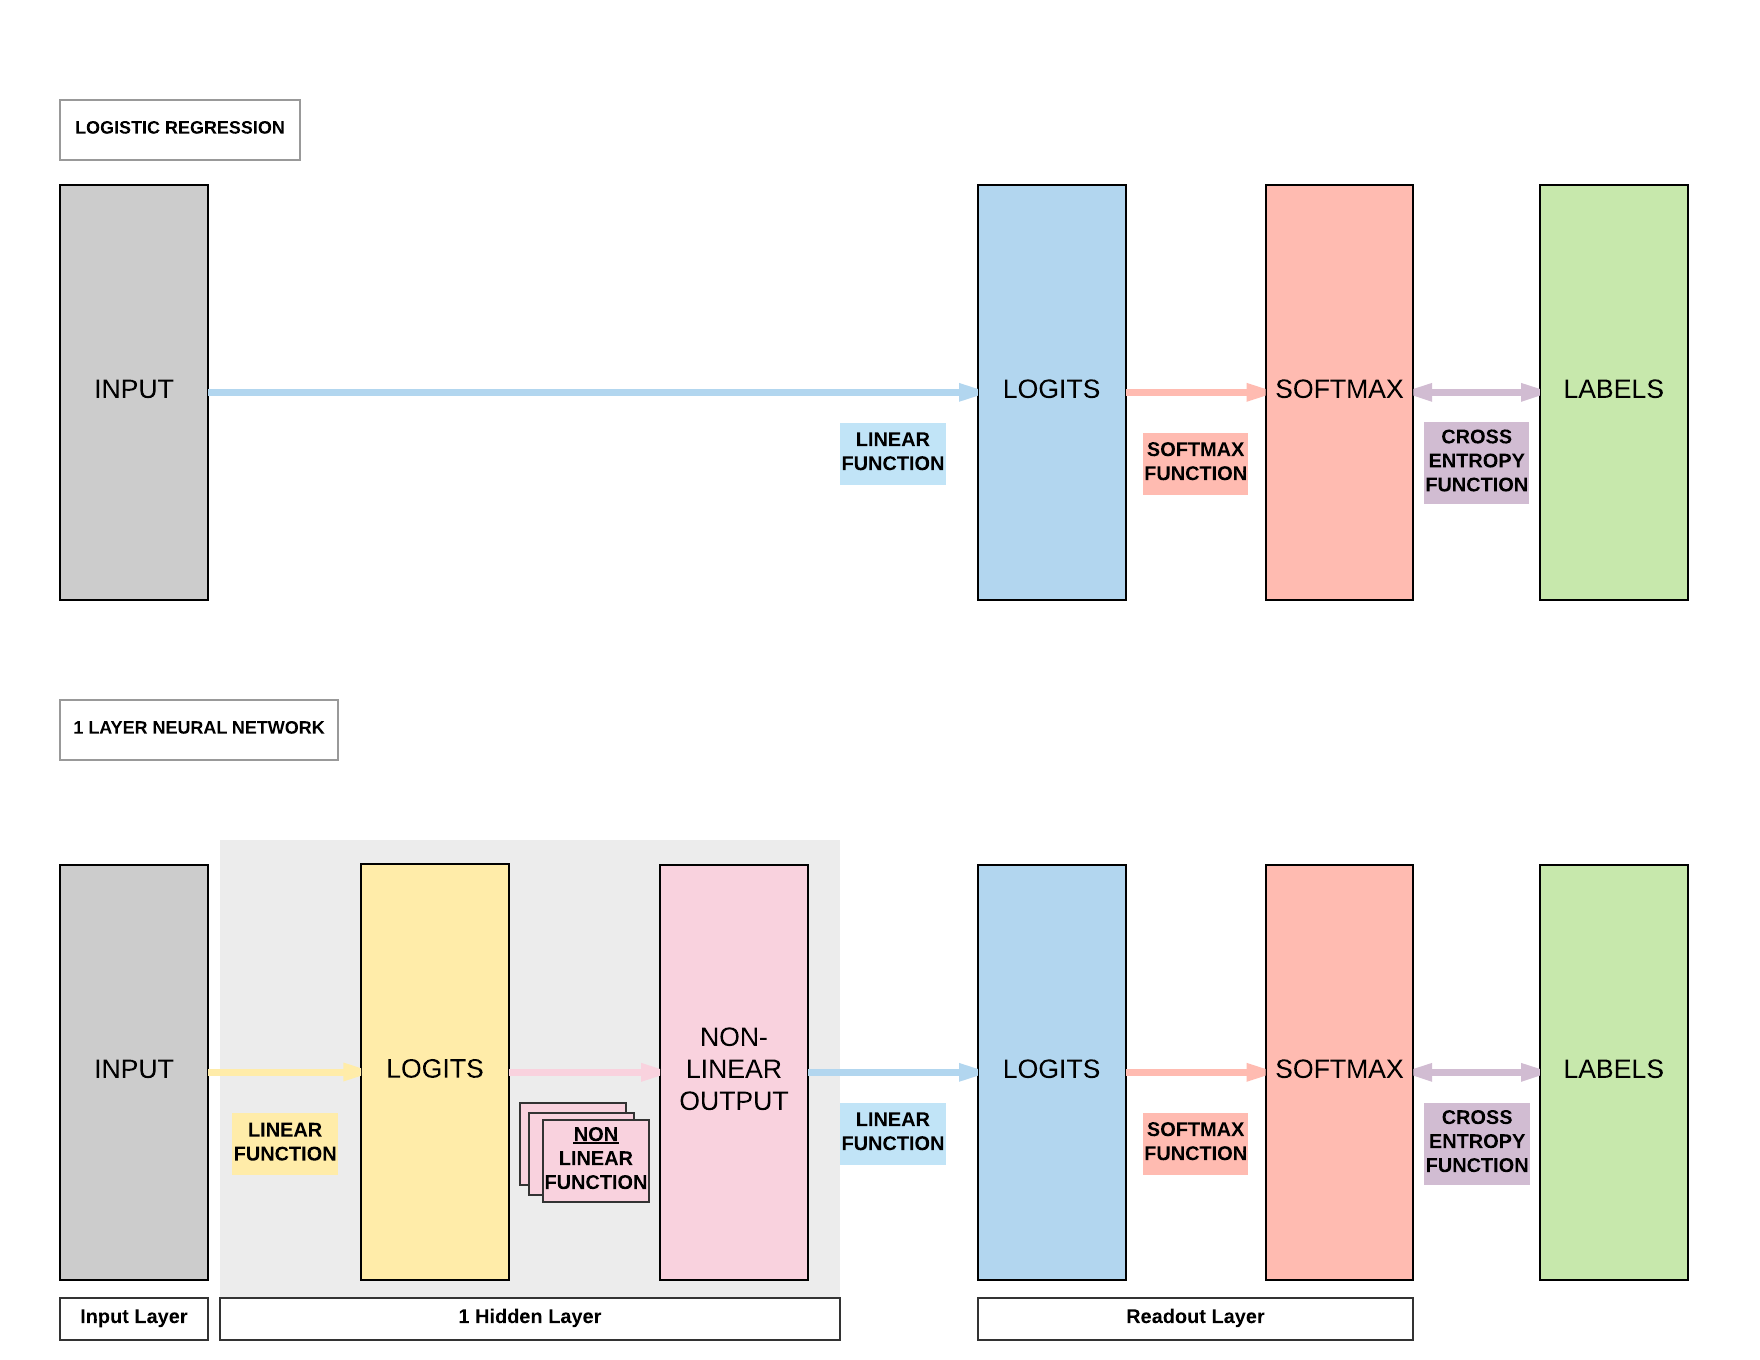
</div>

## Introduction to Non Linear Function

Function: takes a number & perform mathematical operation<br>
Common Types of Non-linearity
* ReLUs (Rectified Linear Units)
* Sigmoid
* Tanh

<div style="margin-left: auto; margin-right: 0;">
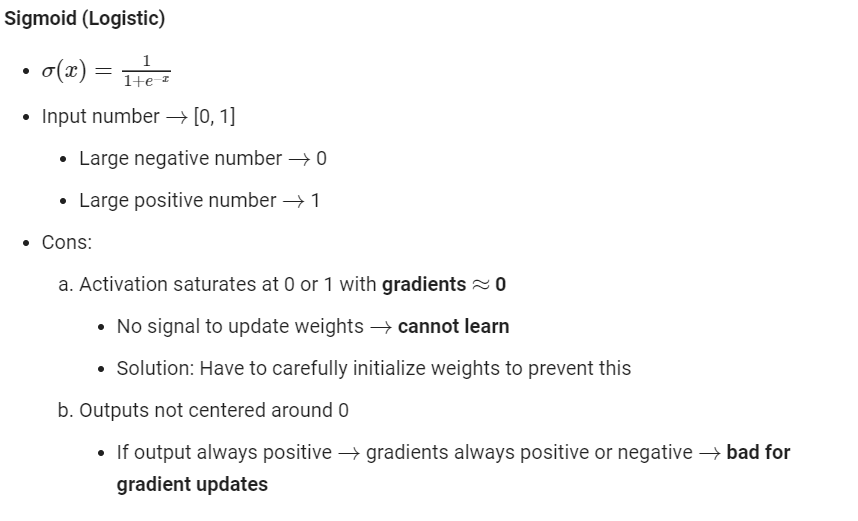
</div>
<div style="margin-left: auto; margin-right: 0;">
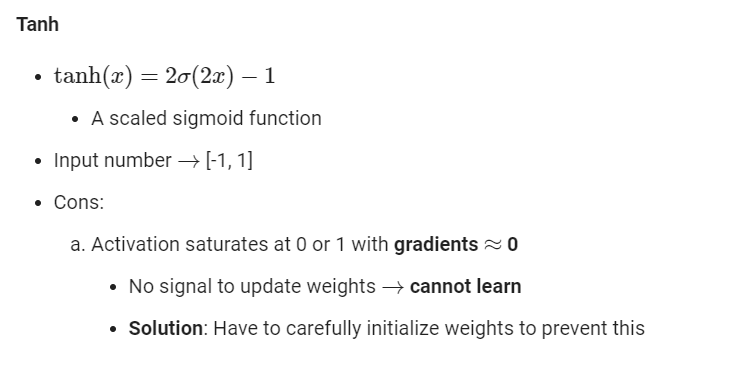
</div>
<div style="margin-left: auto; margin-right: 0;">
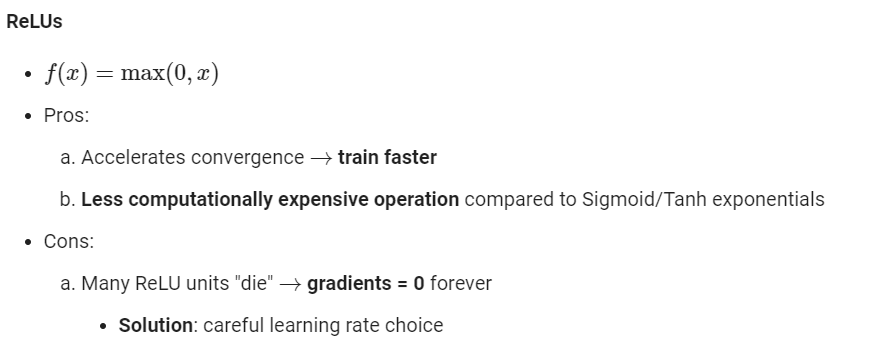
</div>

## Building a Model with FNN

In [123]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.utils.data import random_split
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
dataset = MNIST(root = "/data", download = True)

In [126]:
train_dataset = MNIST(root = "/data", train = True, transform = transforms.ToTensor())
test_dataset = MNIST(root = "/data", train = False, transform = transforms.ToTensor())

In [127]:
batch_size = 100
num_epochs = 5
iterations = len(train_ds) / batch_size * num_epochs

In [128]:
train_loader = DataLoader(train_dataset, batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size)

* FeedforwardNNModel with Sigmaoid

In [ ]:
class FeedforwardNNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNNModel, self).__init__()
        # Linearity
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        # Non-Linearity
        self.sigmoid = nn.Sigmoid()
        # Linearity
        self.linear2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = x.reshape(-1, 784)
        out = self.linear1(x)
        out = self.sigmoid(out)
        out = self.linear2(out)
        return out

* FeedforwardNNModel with tanh

In [116]:
class FeedforwardNNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNNModel, self).__init__()
        # Linearity
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        # Non-Linearity
        self.tanh = nn.Tanh()
        # Linearity
        self.linear2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = x.reshape(-1, 784)
        out = self.linear1(x)
        out = self.tanh(out)
        out = self.linear2(out)
        return out

* FeedforwardNNModel with ReLU

In [129]:
class FeedforwardNNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNNModel, self).__init__()
        # Linearity
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        # Non-Linearity
        self.relu = nn.ReLU()
        # Linearity
        self.linear2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = x.reshape(-1, 784)
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [130]:
input_dim = 28*28
output_dim = 10
# Can be any number - Number of non-linear activation functions
hidden_dim = 100 
model = FeedforwardNNModel(input_dim, hidden_dim, output_dim)

In [131]:
#CrossEntropy function is used on Feedforward Neural Networks models same as Logistic Regression
loss_fn = nn.CrossEntropyLoss()

In [132]:
optimizer = torch.optim.SGD(model.parameters(), 0.1)

In [133]:
iters = 0

for epochs in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        
        predictions = model(images)
        loss = loss_fn(predictions, labels)
        
        loss.backward()
        optimizer.step()
        
        iters += 1
        
        if iters % 500 == 0:
            correct = 0
            accuracy = 0
            for images, labels in test_loader:
                predicts = model(images)
                _, predicted = torch.max(predicts.data, 1)
                total = labels.size(0)
                correct = (predicted == labels).sum()
                
            accuracy = 100 * correct.item() / total
            print("Iterations : {} Loss : {} Accuracy : {}".format(iters,loss,accuracy))

Iterations : 500 Loss : 0.598150908946991 Accuracy : 84.0
Iterations : 1000 Loss : 0.5032374858856201 Accuracy : 88.0
Iterations : 1500 Loss : 0.509440541267395 Accuracy : 89.0
Iterations : 2000 Loss : 0.2217351347208023 Accuracy : 91.0
Iterations : 2500 Loss : 0.33716142177581787 Accuracy : 89.0
Iterations : 3000 Loss : 0.43423205614089966 Accuracy : 89.0


In [134]:
#Testing
trueval = 0
for i in range(3500,9000):
    pred = model(test_dataset[i][0].reshape(-1,784))
    _, pred = torch.max(pred.data, 1)
    image, label = test_dataset[i]
    #print("Prediction : {} Label : {}".format(int(pred),label))
    if pred == label:
        trueval += 1
falseval = 5500 - trueval
print("True predicts : {} False Predicts : {}".format(trueval,falseval))

True predicts : 5128 False Predicts : 372


## Multilayered with ReLU Activation

<div style="margin-left: auto; margin-right: 0;">
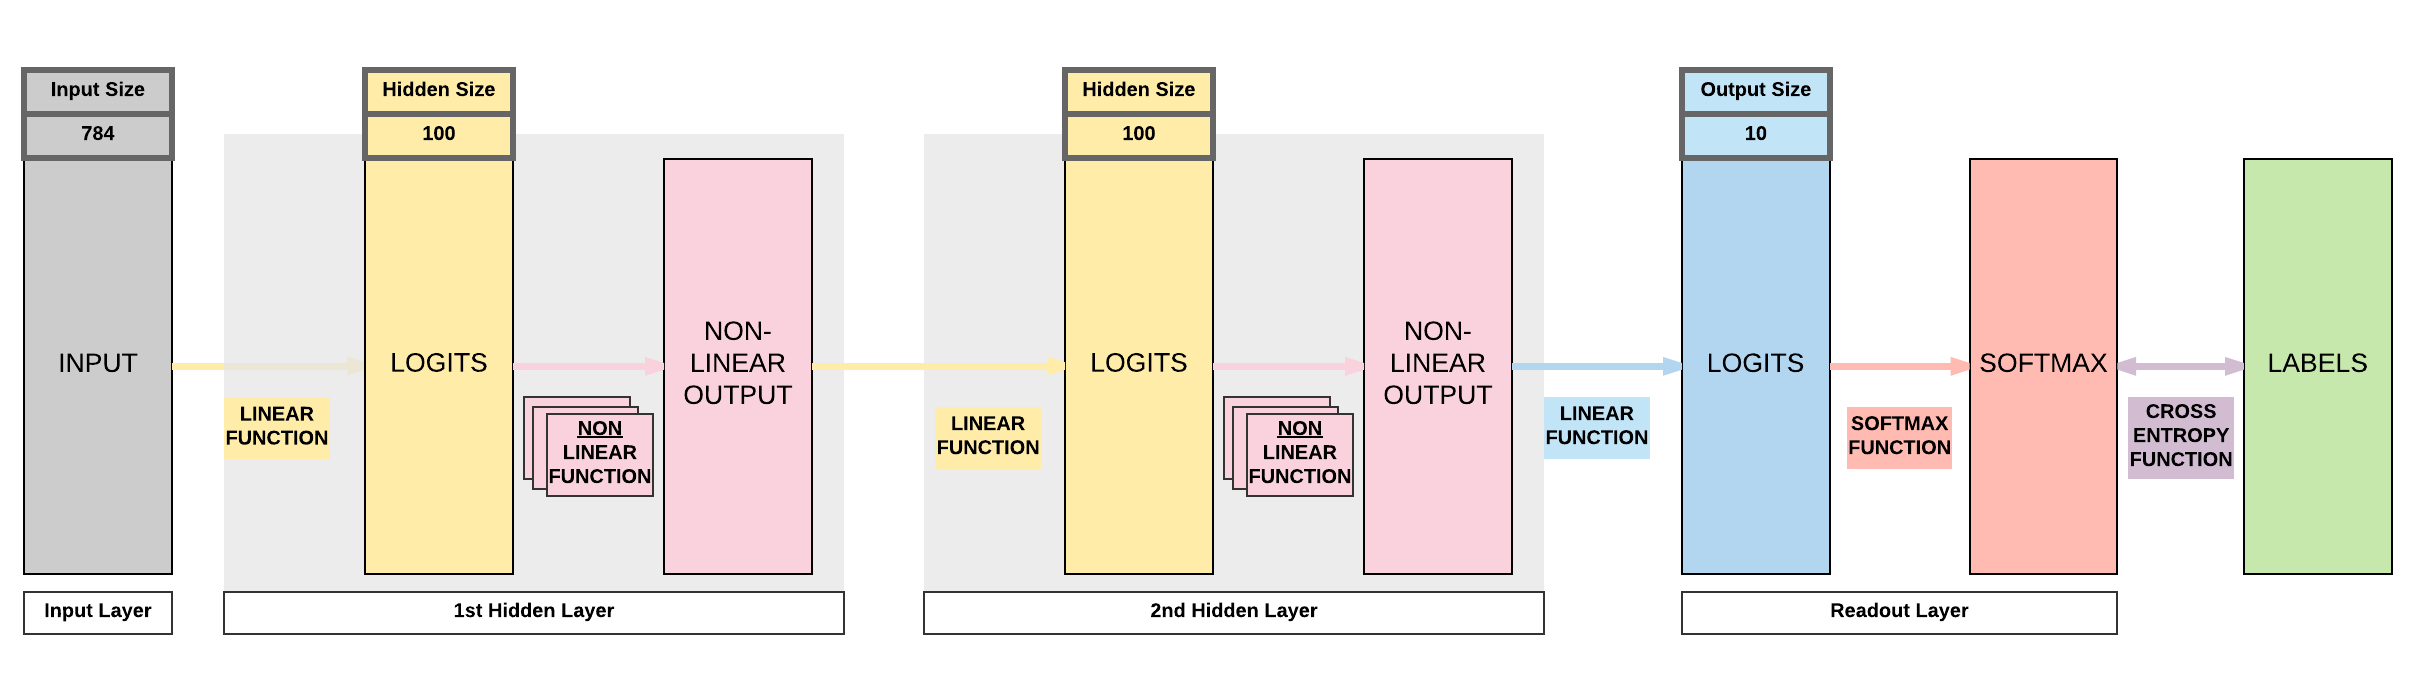
</div>

* The difference on the class

In [137]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.utils.data import random_split
import matplotlib.pyplot as plt
%matplotlib inline

# 3 Layered Feedforward Neural Network Model with ReLU Activation
class FeedforwardNNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNNModel, self).__init__()
        # Linear1
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        # ReLU-1
        self.relu1 = nn.ReLU()
        
        # Linear2
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        # ReLU-2
        self.relu2 = nn.ReLU()
        
        # Linear3
        self.linear3 = nn.Linear(hidden_dim, hidden_dim)
        # ReLU-3
        self.relu3 = nn.ReLU()
        
        # Linear4 - readout
        self.linear4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = x.reshape(-1, 784)
        # First layer
        out = self.linear1(x)
        out = self.relu1(out)
        # Second layer
        out = self.linear2(out)
        out = self.relu2(out)
        # Third layer
        out = self.linear3(out)
        out = self.relu3(out)
        # Output
        out = self.linear4(out)
        return out
    
dataset = MNIST(root = "/data", download = True)
train_dataset = MNIST(root = "/data", train = True, transform = transforms.ToTensor())
test_dataset = MNIST(root = "/data", train = False, transform = transforms.ToTensor())

batch_size = 100
num_epochs = 5
iterations = len(train_ds) / batch_size * num_epochs
train_loader = DataLoader(train_dataset, batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size)

input_dim = 28*28
output_dim = 10
# Can be any number - Number of non-linear activation functions
hidden_dim = 100 
model = FeedforwardNNModel(input_dim, hidden_dim, output_dim)

#CrossEntropy function is used on Feedforward Neural Networks models same as Logistic Regression
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

iters = 0

for epochs in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        
        predictions = model(images)
        loss = loss_fn(predictions, labels)
        
        loss.backward()
        optimizer.step()
        
        iters += 1
        
        if iters % 500 == 0:
            correct = 0
            accuracy = 0
            for images, labels in test_loader:
                predicts = model(images)
                _, predicted = torch.max(predicts.data, 1)
                total = labels.size(0)
                correct = (predicted == labels).sum()
                
            accuracy = 100 * correct.item() / total
            print("Iterations : {} Loss : {} Accuracy : {}".format(iters,loss,accuracy))

Iterations : 500 Loss : 0.39323946833610535 Accuracy : 91.0
Iterations : 1000 Loss : 0.19788116216659546 Accuracy : 90.0
Iterations : 1500 Loss : 0.14391693472862244 Accuracy : 95.0
Iterations : 2000 Loss : 0.079828642308712 Accuracy : 97.0
Iterations : 2500 Loss : 0.026441384106874466 Accuracy : 97.0
Iterations : 3000 Loss : 0.14507779479026794 Accuracy : 98.0


In [140]:
#Testing
trueval = 0
for i in range(1000,6500):
    pred = model(test_dataset[i][0].reshape(-1,784))
    _, pred = torch.max(pred.data, 1)
    image, label = test_dataset[i]
    #print("Prediction : {} Label : {}".format(int(pred),label))
    if pred == label:
        trueval += 1
falseval = 5500 - trueval
print("True predicts : {} False Predicts : {}".format(trueval,falseval))

True predicts : 5288 False Predicts : 212


## Build a Feedforward Neural Network Model on the GPU with PyTorch

* These 2 things must on the GPU : model , tensors

In [144]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.utils.data import random_split
import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# GPU Model
class FeedforwardNNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNNModel, self).__init__()
        # Linear1
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        # ReLU-1
        self.relu1 = nn.ReLU()
        
        # Linear2
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        # ReLU-2
        self.relu2 = nn.ReLU()
        
        # Linear3
        self.linear3 = nn.Linear(hidden_dim, hidden_dim)
        # ReLU-3
        self.relu3 = nn.ReLU()
        
        # Linear4 - readout
        self.linear4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = x.reshape(-1, 784)
        # First layer
        out = self.linear1(x)
        out = self.relu1(out)
        # Second layer
        out = self.linear2(out)
        out = self.relu2(out)
        # Third layer
        out = self.linear3(out)
        out = self.relu3(out)
        # Output
        out = self.linear4(out)
        return out
    
dataset = MNIST(root = "/data", download = True)
train_dataset = MNIST(root = "/data", train = True, transform = transforms.ToTensor())
test_dataset = MNIST(root = "/data", train = False, transform = transforms.ToTensor())

batch_size = 100
num_epochs = 5
iterations = len(train_ds) / batch_size * num_epochs
train_loader = DataLoader(train_dataset, batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size)

input_dim = 28*28
output_dim = 10
# Can be any number - Number of non-linear activation functions
hidden_dim = 100 
model = FeedforwardNNModel(input_dim, hidden_dim, output_dim)
model.to(device)

#CrossEntropy function is used on Feedforward Neural Networks models same as Logistic Regression
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

iters = 0

for epochs in range(num_epochs):
    for images, labels in train_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        predictions = model(images)
        loss = loss_fn(predictions, labels)
        
        loss.backward()
        optimizer.step()
        
        iters += 1
        
        if iters % 500 == 0:
            correct = 0
            accuracy = 0
            for images, labels in test_loader:
                images = images.to(device)
                
                predicts = model(images)
                _, predicted = torch.max(predicts.data, 1)
                total = labels.size(0)
                if torch.cuda.is_available():
                    correct = (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct = (predicted == labels).sum()
                
            accuracy = 100 * correct.item() / total
            print("Iterations : {} Loss : {} Accuracy : {}".format(iters,loss,accuracy))

Iterations : 500 Loss : 0.34829938411712646 Accuracy : 87.0
Iterations : 1000 Loss : 0.31291380524635315 Accuracy : 93.0
Iterations : 1500 Loss : 0.1458321213722229 Accuracy : 93.0
Iterations : 2000 Loss : 0.09422275424003601 Accuracy : 97.0
Iterations : 2500 Loss : 0.12032126635313034 Accuracy : 98.0
Iterations : 3000 Loss : 0.030636414885520935 Accuracy : 98.0


In [147]:
#Testing
trueval = 0
for i in range(3500,9000):
    images = test_dataset[i][0].to(device)
    pred = model(images.reshape(-1,784))
    _, pred = torch.max(pred.data, 1)
    image, label = test_dataset[i]
    #print("Prediction : {} Label : {}".format(int(pred),label))
    if pred == label:
        trueval += 1
falseval = 5500 - trueval
print("True predicts : {} False Predicts : {}".format(trueval,falseval))

True predicts : 5354 False Predicts : 146
